## Ejemplo de Aplicación con la red IEEE 13 modificada ##


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import math

In [4]:
import pandapower as pp

In [5]:
import pandas as pd

In [6]:
import pyomo.environ as pe

In [7]:
import matplotlib.pyplot as plt

In [8]:
import ModelWriters as mw

In [9]:
import ModelWriters.Scenes as Scenes

In [10]:
import ModelWriters.Resources as Resources

In [11]:
import ModelWriters.Simulation as Simulation

Creating Network

In [12]:
net = pp.create_empty_network() 

Adding line parameter data:

In [13]:
line_data = {"c_nf_per_km": 0, "r_ohm_per_km": 0.40, "x_ohm_per_km": 0.30, "max_i_ka": 0.300, "type": "al", "q_mm2": 95, "alpha": 4.03e-3}
pp.create_std_type(net, line_data, "AlAc 95", element='line')

line_data = {"c_nf_per_km": 0, "r_ohm_per_km": 0.50, "x_ohm_per_km": 0.35, "max_i_ka": 0.250, "type": "al", "q_mm2": 70, "alpha": 4.03e-3}
pp.create_std_type(net, line_data, "AlAc 70", element='line')

line_data = {"c_nf_per_km": 0, "r_ohm_per_km": 0.70, "x_ohm_per_km": 0.40, "max_i_ka": 0.190, "type": "al", "q_mm2": 50, "alpha": 4.03e-3}
pp.create_std_type(net, line_data, "AlAc 50", element='line')

line_data = {"c_nf_per_km": 0, "r_ohm_per_km": 1.20, "x_ohm_per_km": 0.45, "max_i_ka": 0.130, "type": "al", "q_mm2": 25, "alpha": 4.03e-3}
pp.create_std_type(net, line_data, "AlAc 25", element='line')

In [14]:

b650 = pp.create_bus(net, name='650', vn_kv=13.2) 

pp.create_ext_grid(net, name='Ext Grid', bus=b650)

b632 = pp.create_bus(net, name='632', vn_kv=13.2) 
b633 = pp.create_bus(net, name='633', vn_kv=13.2) 
b645 = pp.create_bus(net, name='645', vn_kv=13.2) 
b646 = pp.create_bus(net, name='646', vn_kv=13.2) 

b671 = pp.create_bus(net, name='671', vn_kv=13.2)  
b675 = pp.create_bus(net, name='675', vn_kv=13.2) 

b611 = pp.create_bus(net, name='611', vn_kv=13.2) 
b684 = pp.create_bus(net, name='684', vn_kv=13.2) 
b652 = pp.create_bus(net, name='652', vn_kv=13.2) 

pp.create_line(net, name='L 650-632', from_bus=b650, to_bus=b632, length_km=2.0, std_type="AlAc 95") 
pp.create_line(net, name='L 632-671', from_bus=b632, to_bus=b671, length_km=2.0, std_type="AlAc 95") 
pp.create_line(net, name='L 671-684', from_bus=b671, to_bus=b684, length_km=1.5, std_type="AlAc 70") 

pp.create_line(net, name='L 632-645', from_bus=b632, to_bus=b645, length_km=0.5, std_type="AlAc 50") 
pp.create_line(net, name='L 645-646', from_bus=b645, to_bus=b646, length_km=0.5, std_type="AlAc 50") 
pp.create_line(net, name='L 632-633', from_bus=b632, to_bus=b633, length_km=1.0, std_type="AlAc 50") 
pp.create_line(net, name='L 671-675', from_bus=b671, to_bus=b675, length_km=1.0, std_type="AlAc 50") 
pp.create_line(net, name='L 684-611', from_bus=b684, to_bus=b611, length_km=0.5, std_type="AlAc 25") 
pp.create_line(net, name='L 684-652', from_bus=b684, to_bus=b652, length_km=1.0, std_type="AlAc 25") 

pp.create_load(net, bus=b645, p_mw=1.20, q_mvar = 0.58)
pp.create_load(net, bus=b646, p_mw=1.50, q_mvar = 0.58*1.5/1.2)
pp.create_load(net, bus=b633, p_mw=0.80, q_mvar = math.sqrt((0.80/0.85)**2-0.8**2))
pp.create_load(net, bus=b675, p_mw=0.90, q_mvar = math.sqrt((0.90/0.85)**2-0.9**2))
pp.create_load(net, bus=b611, p_mw=0.50, q_mvar = math.sqrt((0.50/0.80)**2-0.5**2))
pp.create_load(net, bus=b652, p_mw=0.60, q_mvar = math.sqrt((0.60/0.80)**2-0.6**2))


pp.create_sgen(net, name='PV 684', bus=b684, p_mw=0.00, q_mvar=0.00, max_p_mw=0.00, max_q_mvar=0.00)
pp.create_sgen(net, name='PV 633', bus=b633, p_mw=0.00, q_mvar=0.00, max_p_mw=0.00, max_q_mvar=0.00)
pp.create_sgen(net, name='PV 646', bus=b646, p_mw=0.00, q_mvar=0.00, max_p_mw=0.00, max_q_mvar=0.00)

pp.create_sgen(net, name='WT 633', bus=b633, p_mw=0.00, q_mvar=0.00, max_p_mw=0.00, max_q_mvar=0.00)

pp.create_storage(net, name='ST 684', bus=b684, p_mw=0.00, q_mvar=0.00, max_p_mw=0.00, max_q_mvar=0.00, max_e_mwh = 0.0)
pp.create_storage(net, name='ST 632', bus=b632, p_mw=0.00, q_mvar=0.00, max_p_mw=0.00, max_q_mvar=0.00, max_e_mwh = 0.0)


1

In [15]:
net.bus

,name,vn_kv,type,zone,in_service
0,650,13.2,b,None,True
1,632,13.2,b,None,True
2,633,13.2,b,None,True
3,645,13.2,b,None,True
4,646,13.2,b,None,True
5,671,13.2,b,None,True
6,675,13.2,b,None,True
7,611,13.2,b,None,True
8,684,13.2,b,None,True
9,652,13.2,b,None,True


In [16]:
net.ext_grid

,name,bus,vm_pu,va_degree,in_service
0,Ext Grid,0,1.0,0.0,True


In [17]:
net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,max_p_mw,max_q_mvar
0,PV 684,8,0.0,0.0,NaN,1.0,True,wye,True,0.0,0.0
1,PV 633,2,0.0,0.0,NaN,1.0,True,wye,True,0.0,0.0
2,PV 646,4,0.0,0.0,NaN,1.0,True,wye,True,0.0,0.0
3,WT 633,2,0.0,0.0,NaN,1.0,True,wye,True,0.0,0.0


In [18]:
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,None,3,1.2,0.580000,0.0,0.0,NaN,1.0,True,wye
1,None,4,1.5,0.725000,0.0,0.0,NaN,1.0,True,wye
2,None,2,0.8,0.495795,0.0,0.0,NaN,1.0,True,wye
3,None,6,0.9,0.557770,0.0,0.0,NaN,1.0,True,wye
4,None,7,0.5,0.375000,0.0,0.0,NaN,1.0,True,wye
5,None,9,0.6,0.450000,0.0,0.0,NaN,1.0,True,wye


In [19]:
net.storage

,name,bus,p_mw,q_mvar,sn_mva,soc_percent,min_e_mwh,max_e_mwh,scaling,in_service,type,max_p_mw,max_q_mvar
0,ST 684,8,0.0,0.0,NaN,NaN,0.0,0.0,1.0,True,None,0.0,0.0
1,ST 632,1,0.0,0.0,NaN,NaN,0.0,0.0,1.0,True,None,0.0,0.0


In [20]:
 pp.runpp(net)

In [21]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-5.787786,-3.390437
1,0.961761,-0.259960,0.000000,0.000000
2,0.957214,-0.250296,0.800000,0.495795
3,0.954492,-0.289781,1.200000,0.580000
4,0.950446,-0.306545,1.500000,0.725000
5,0.946893,-0.294868,0.000000,0.000000
6,0.941694,-0.283643,0.900000,0.557770
7,0.936815,-0.238107,0.500000,0.375000
8,0.939170,-0.280154,0.000000,0.000000
9,0.933497,-0.178884,0.600000,0.450000


In [22]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,5.787786,3.390437,-5.581204,-3.235501,0.206582,0.154936,0.293387,0.293387,0.293387,1.000000,0.000000,0.961761,-0.259960,97.795574
1,2.051226,1.417575,-2.020366,-1.394430,0.030860,0.023145,0.113394,0.113394,0.113394,0.961761,-0.259960,0.946893,-0.294868,37.798022
2,1.115287,0.833758,-1.105978,-0.827242,0.009309,0.006516,0.064321,0.064321,0.064321,0.946893,-0.294868,0.939170,-0.280154,25.728549
3,2.726094,1.319911,-2.706172,-1.308527,0.019922,0.011384,0.137744,0.137744,0.137744,0.961761,-0.259960,0.954492,-0.289781,72.496695
4,1.506172,0.728527,-1.500000,-0.725000,0.006172,0.003527,0.076669,0.076669,0.076669,0.954492,-0.289781,0.950446,-0.306545,40.351960
5,0.803884,0.498015,-0.800000,-0.495795,0.003884,0.002219,0.043006,0.043006,0.043006,0.961761,-0.259960,0.957214,-0.250296,22.634647
6,0.905079,0.560672,-0.900000,-0.557770,0.005079,0.002902,0.049179,0.049179,0.049179,0.946893,-0.294868,0.941694,-0.283643,25.883659
7,0.501533,0.375575,-0.500000,-0.375000,0.001533,0.000575,0.029180,0.029180,0.029180,0.939170,-0.280154,0.936815,-0.238107,22.446475
8,0.604446,0.451667,-0.600000,-0.450000,0.004446,0.001667,0.035141,0.035141,0.035141,0.939170,-0.280154,0.933497,-0.178884,27.031511


In [23]:
print(net)

This pandapower network includes the following parameter tables:
   - bus (10 elements)
   - load (6 elements)
   - sgen (4 elements)
   - storage (2 elements)
   - ext_grid (1 element)
   - line (9 elements)
 and the following results tables:
   - res_bus (10 elements)
   - res_line (9 elements)
   - res_ext_grid (1 element)
   - res_load (6 elements)
   - res_sgen (4 elements)
   - res_storage (2 elements)


## Construcción de Escenarios

In [24]:
Mean_Monthly_Solar_Irradiance = [7.5e3, 7.2e3, 6.5e3, 5.5e3, 4.5e3, 3.5e3, 2.5e3, 3.5e3, 4.5e3, 6.0e3, 7.0e3, 8.5e3]

In [25]:
sun_synth = Simulation.MonthlySolarIrradianceSimulator(latitude = -40.5490, longitude = -62.2438, 
                                                       monthly_average_irradiation = Mean_Monthly_Solar_Irradiance)

In [26]:
wind_synth = Simulation.Weibull(c = 7.5 / 0.886, k = 2)

In [27]:
wind_synth = Simulation.CorrelatedWeibull(c = 7.5 / 0.886, k = 2)

In [28]:
#s = Scenes.SceneBuilder(years = 4, subperiods = 1, days_in_subperiods = 1, dt=24, growth_rate = 0.025, discount_rate = 0.05)
#s = Scenes.SceneBuilder(years = 4, subperiods = 4, days_in_subperiods = 1, dt=1, growth_rate = 0.025, discount_rate = 0.05)
#s = Scenes.SceneBuilder(years = 20, subperiods = 4, days_in_subperiods = 5, dt=2, growth_rate = 0.025, discount_rate = 0.03)
#s = Scenes.SceneBuilder(years = 20, subperiods = 12, days_in_subperiods = 7, growth_rate = 0.025, discount_rate = 0.03)
#s = Scenes.SceneBuilder(years = 20, subperiods = 1, days_in_subperiods = 365, dt = 1, growth_rate = 0.025, discount_rate = 0.03)
s = Scenes.SceneBuilder(years = 20, subperiods = 6, days_in_subperiods = 3, dt = 1, growth_rate = 0.025, discount_rate = 0.10)
s.additional_columns['solar_irradiance'] = sun_synth
s.additional_columns['wind_speed'] = wind_synth
scenes = s.build_scenes()
scenes

,year,day,dd,hour,dt,growth,discount,solar_irradiance,wind_speed
0,0.0,0.0,20.277778,0.0,1.0,1.00000,1.000000,0.0,2.851132
1,0.0,0.0,20.277778,1.0,1.0,1.00000,1.000000,0.0,8.183253
2,0.0,0.0,20.277778,2.0,1.0,1.00000,1.000000,0.0,7.507410
3,0.0,0.0,20.277778,3.0,1.0,1.00000,1.000000,0.0,5.540644
4,0.0,0.0,20.277778,4.0,1.0,1.00000,1.000000,0.0,5.047892
...,...,...,...,...,...,...,...,...,...
8635,19.0,302.0,20.277778,19.0,1.0,1.59865,0.163508,0.0,8.325915
8636,19.0,302.0,20.277778,20.0,1.0,1.59865,0.163508,0.0,7.941367
8637,19.0,302.0,20.277778,21.0,1.0,1.59865,0.163508,0.0,6.026760
8638,19.0,302.0,20.277778,22.0,1.0,1.59865,0.163508,0.0,6.392445


## External Data Loading

### Residential User, summer and winter cases

In [29]:
residential_user_summer = pd.read_csv('.\\Data\\UserResSum.csv', header = None, squeeze = True)
residential_user_summer

0     0.80
1     0.40
2     0.25
3     0.20
4     0.20
5     0.20
6     0.20
7     0.25
8     0.25
9     0.20
10    0.20
11    0.20
12    0.40
13    0.60
14    0.80
15    0.80
16    0.60
17    0.60
18    0.60
19    0.70
20    0.80
21    0.95
22    1.00
23    0.90
Name: 0, dtype: float64

In [30]:
residential_user_winter = pd.read_csv('.\\Data\\UserResWin.csv', header = None, squeeze = True)*0.33 
residential_user_winter

0     0.1848
1     0.1320
2     0.0528
3     0.0396
4     0.0396
5     0.0396
6     0.0660
7     0.0660
8     0.0660
9     0.0528
10    0.0528
11    0.0528
12    0.1056
13    0.1056
14    0.1056
15    0.1320
16    0.1320
17    0.1320
18    0.1320
19    0.1848
20    0.2112
21    0.2640
22    0.2640
23    0.2376
Name: 0, dtype: float64

Data is loaded to a data syntethizer:

In [31]:
Residential_Synth = Simulation.DailyInterpolator( post_random_up=0.15, post_random_down=0.15)

#data is hourly, 24 hs
hours = [h for h in range(24)]

Residential_Synth.add_day(355, hours, residential_user_summer)   #north hemisfere convention, summer is June 21st
Residential_Synth.add_day(172, hours, residential_user_winter)   #north hemisfere convention, summer is June 21st


### Commercial User, summer and winter cases

In [32]:
commercial_user_summer = pd.read_csv('.\\Data\\UserComSum.csv', header = None, squeeze = True) 

In [33]:
commercial_user_winter = pd.read_csv('.\\Data\\UserComWin.csv', header = None, squeeze = True) 

Data is loaded to a data syntethizer:

In [34]:
Commercial_Synth = Simulation.DailyInterpolator( post_random_up=0.15, post_random_down=0.15)
Commercial_Synth.add_day(355, hours, commercial_user_summer)   #north hemisfere convention, summer is June 21st
Commercial_Synth.add_day(172, hours, commercial_user_winter)   #north hemisfere convention, summer is June 21st


### Industrial User, summer and winter cases

In [35]:
industrial_user_summer = pd.read_csv('.\\Data\\UserIndSum.csv', header = None, squeeze = True) 

In [36]:
industrial_user_winter = pd.read_csv('.\\Data\\UserIndWin.csv', header = None, squeeze = True) 

Data is loaded to a data syntethizer:

In [37]:
Industrial_Synth = Simulation.DailyInterpolator( post_random_up=0.05, post_random_down=0.05)
Industrial_Synth.add_day(355, hours, industrial_user_summer)   #north hemisfere convention, summer is June 21st
Industrial_Synth.add_day(172, hours, industrial_user_winter)   #north hemisfere convention, summer is June 21st


Example using Residential User:

In [38]:
res = [Residential_Synth.simulate(scenes.iloc[i]) for i in range(len(scenes))]

No handles with labels found to put in legend.


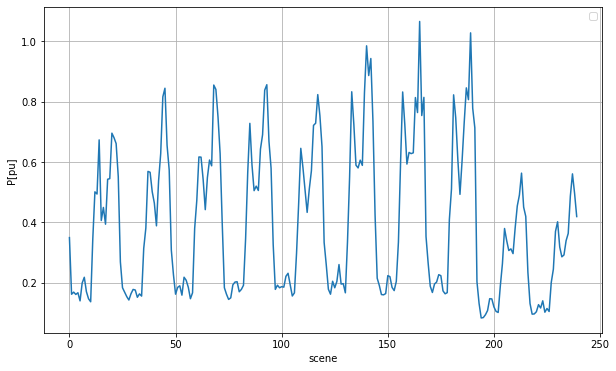

In [39]:
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
    
ax.plot(res[240:480])
    
ax.set_xlabel('scene')
ax.set_ylabel('P[pu]')

ax.legend()

ax.grid(True)


plt.show()

In [40]:
res = [Industrial_Synth.simulate(scenes.iloc[i]) for i in range(len(scenes))]

No handles with labels found to put in legend.


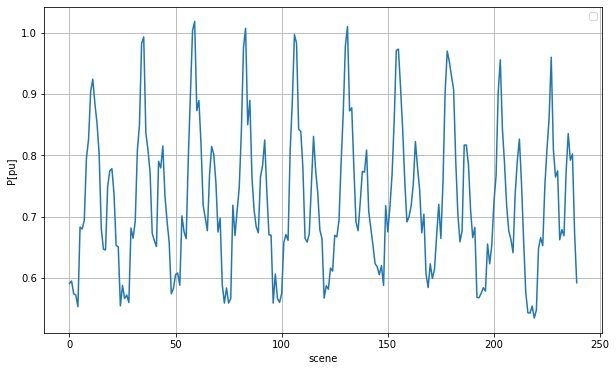

In [41]:
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
    
ax.plot(res[240:480])
    
ax.set_xlabel('scene')
ax.set_ylabel('P[pu]')

ax.legend()

ax.grid(True)


plt.show()

In [42]:
def plot_results(results, a = 0, b = 240, items = None, elements = False, lines = False, l_ep = False):
    # Set the plot curve with markers and a title
    if not (elements or lines or l_ep or items):
        raise Exception("Nothing to plot")
    
    fig, ax = plt.subplots(1, 1)

    fig.set_size_inches(10,6)
    
    for col in results:
        p = False
        if items and col in items:
            p = True
        elif col[0:2] == 'L ':
            if col[-4:] == 'ep_h':
                if l_ep:
                    p = True
            elif lines:
                p = True
        elif elements:
            p = True

        if p:
            ax.plot(results[col][a:b], label = col)
    
    ax.set_xlabel('time')
    ax.set_ylabel('P[mw]')

    ax.legend()

    ax.grid(True)


    plt.show()
    

# LCOE without DG.

## Optimization models

In [43]:
mw.network_precondition(net)

In [44]:
net.ext_grid['model'][0] = Resources.ExtGrid('SET', pr_mw = 10.0, peak_value=150, valley_value=80, rest_value=100)

In [45]:
net.load['model'][0] = Resources.Load('645', pr_mw = 1.20, pa_pu = Residential_Synth)
net.load['model'][1] = Resources.Load('646', pr_mw = 1.50, pa_pu = Residential_Synth)
net.load['model'][2] = Resources.Load('633', pr_mw = 0.80, pa_pu = Residential_Synth)
net.load['model'][3] = Resources.Load('675', pr_mw = 0.90, pa_pu = Residential_Synth)
net.load['model'][4] = Resources.Load('611', pr_mw = 0.50, pa_pu = Residential_Synth)
net.load['model'][5] = Resources.Load('652', pr_mw = 0.60, pa_pu = Residential_Synth)

In [46]:
net.sgen['model'][0] = Resources.PVGenerator('PV 684', ic_0_mu = 10.0e3, ic_1_mu = 1.35e6, oc_0_mu = 15.0e3/8760, oc_1_mu = 0.0)
net.sgen['model'][1] = Resources.PVGenerator('PV 633', ic_0_mu = 10.0e3, ic_1_mu = 1.35e6, oc_0_mu = 15.0e3/8760, oc_1_mu = 0.0)
net.sgen['model'][2] = Resources.PVGenerator('PV 646', ic_0_mu = 10.0e3, ic_1_mu = 1.35e6, oc_0_mu = 15.0e3/8760, oc_1_mu = 0.0)

net.sgen['model'][3] = Resources.WTGeneratorDiscrete('WT 633', ic_0_mu = 10.0e3, unit_size_mw = 0.800, unit_cost_mu = 1200e3, oc_0_mu = 0.00,
                                                     oc_1_mu = 15.0, cut_in = 3.0, v_rated = 12.0, cut_out = 34.0)   #Enercom E-53 800 kW
#net.sgen['model'][2] = Resources.PVGeneratorDiscrete('PV2', unit_size_mw = 0.05, unit_cost_mu = 51e3, oc_0_mu = 0.03, oc_1_mu = 0.0)

In [47]:
#net.storage['model'][0] = Resources.Storage('ST 684', ic_1_mu = 554e3, ic_1_mu_cap = 1000e3, oc_1_mu = 2.28*4, eta_bb = 0.8, sigma = 2.1e-3)
#net.storage['model'][1] = Resources.Storage('ST 632', ic_1_mu = 554e3, ic_1_mu_cap = 1000e3, oc_1_mu = 2.28*4, eta_bb = 0.8, sigma = 2.1e-3)
#net.storage['model'][0] = Resources.Storage('ST 684', ic_1_mu = 300e3, ic_1_mu_cap = 500e3, oc_1_mu = 2.28*4/4, eta_bb = 0.8, sigma = 2.1e-3)
#net.storage['model'][1] = Resources.Storage('ST 632', ic_1_mu = 300e3, ic_1_mu_cap = 500e3, oc_1_mu = 2.28*4/4, eta_bb = 0.8, sigma = 2.1e-3)

net.storage['model'][0] = Resources.Storage('ST 684', ic_0_mu = 10e3, ic_1_mu = 100.0e3, ic_1_mu_cap = 1000e3, oc_0_mu = 15e3/8760, oc_1_mu = 0.0, eta_bb = 0.9, sigma = 2.1e-3)
net.storage['model'][1] = Resources.Storage('ST 632', ic_0_mu = 10e3, ic_1_mu = 100.0e3, ic_1_mu_cap = 1000e3, oc_0_mu = 15e3/8760, oc_1_mu = 0.0, eta_bb = 0.9, sigma = 2.1e-3)


In [48]:
net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,max_p_mw,max_q_mvar,model
0,PV 684,8,0.0,0.0,NaN,1.0,True,wye,True,0.0,0.0,Resource: PV 684
1,PV 633,2,0.0,0.0,NaN,1.0,True,wye,True,0.0,0.0,Resource: PV 633
2,PV 646,4,0.0,0.0,NaN,1.0,True,wye,True,0.0,0.0,Resource: PV 646
3,WT 633,2,0.0,0.0,NaN,1.0,True,wye,True,0.0,0.0,Resource: WT 633


In [49]:
net.storage

,name,bus,p_mw,q_mvar,sn_mva,soc_percent,min_e_mwh,max_e_mwh,scaling,in_service,type,max_p_mw,max_q_mvar,model
0,ST 684,8,0.0,0.0,NaN,NaN,0.0,0.0,1.0,True,None,0.0,0.0,Resource: ST 684
1,ST 632,1,0.0,0.0,NaN,NaN,0.0,0.0,1.0,True,None,0.0,0.0,Resource: ST 632


# LCOE without DERs

## Model Creation

In [50]:
#model_writer = mw.MultiBusbarModelWriter(net, scenes, overload_cost = 2.0)
#model_writer = mw.MultiBusbarModelWriter(net, scenes, overload_cost = None)
#model_writer = mw.MultiBusbarModelWriter(net, scenes, overload_hours = 4000)
model_writer = mw.MultiBusbarModelWriter(net, scenes, overload_cost = None, overload_hours = None, max_i_pu = 1.2)

In [51]:
model = model_writer.create_model()

In [52]:
if len(scenes) < 40:
    model.pprint()

### Additional Constraints

1) No PV plant
2) No Storage
3) No WTG

In [53]:
model_writer.additional_constraint("no_PV", net.sgen['model'][0].create + net.sgen['model'][1].create + net.sgen['model'][2].create == 0)
model_writer.additional_constraint("no_ST", net.storage['model'][0].create + net.storage['model'][1].create  == 0)

In [54]:
model_writer.additional_constraint("no_WT", net.sgen['model'][3].create == 0)

## Resolution

In [55]:
opt = pe.SolverFactory('cplex')
result_obj= opt.solve(model, tee=True)


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 20.1.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2020.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\jmsar\AppData\Local\Temp\tmpmp1aajvg.cplex.log' open.
CPLEX> Problem 'C:\Users\jmsar\AppData\Local\Temp\tmpbmla7pkn.pyomo.lp' read.
Read time = 0.53 sec. (19.34 ticks)
CPLEX> Problem name         : C:\Users\jmsar\AppData\Local\Temp\tmpbmla7pkn.pyomo.lp
Objective sense      : Minimize
Variables            :  155536  [Nneg: 51849,  Box: 86400,  Free: 17280,
                                 Binary: 6,  General Integer: 1]
Objective nonzeros   :   17294
Linear constraints   :  207373  [Less: 103688,  Equal: 103685]
  Nonzeros           :  460832
  RHS nonzeros       :   51841

Variables  

In [56]:
model_writer.backconfigure_network()

In [57]:
model_writer.net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,max_p_mw,max_q_mvar,model
0,PV 684,8,0.0,0.0,NaN,1.0,False,wye,True,0.0,0.0,Resource: PV 684
1,PV 633,2,0.0,0.0,NaN,1.0,False,wye,True,0.0,0.0,Resource: PV 633
2,PV 646,4,0.0,0.0,NaN,1.0,False,wye,True,0.0,0.0,Resource: PV 646
3,WT 633,2,0.0,0.0,NaN,1.0,False,wye,True,0.0,0.0,Resource: WT 633


In [58]:
model_writer.net.storage

,name,bus,p_mw,q_mvar,sn_mva,soc_percent,min_e_mwh,max_e_mwh,scaling,in_service,type,max_p_mw,max_q_mvar,model
0,ST 684,8,0.0,0.0,NaN,NaN,0.0,0.0,1.0,False,None,0.0,0.0,Resource: ST 684
1,ST 632,1,0.0,0.0,NaN,NaN,0.0,0.0,1.0,False,None,0.0,0.0,Resource: ST 632


In [59]:
Resultados = model_writer.get_scenes_results()

In [60]:
Resultados

,SET_p_mw,645_p_mw,646_p_mw,633_p_mw,675_p_mw,611_p_mw,652_p_mw,L 650_632_pf_mw,L 632_671_pf_mw,L 671_684_pf_mw,L 632_645_pf_mw,L 645_646_pf_mw,L 632_633_pf_mw,L 671_675_pf_mw,L 684_611_pf_mw,L 684_652_pf_mw
0,1.222704,-0.255990,-0.356713,-0.175190,-0.192637,-0.122947,-0.119228,-1.222704,-0.434811,-0.242174,-0.612703,-0.356713,-0.175190,-0.192637,-0.122947,-0.119228
1,0.677586,-0.132850,-0.188934,-0.098647,-0.113097,-0.068033,-0.076027,-0.677586,-0.257156,-0.144059,-0.321783,-0.188934,-0.098647,-0.113097,-0.068033,-0.076027
2,0.512473,-0.116259,-0.124449,-0.075897,-0.094304,-0.044983,-0.056580,-0.512473,-0.195868,-0.101564,-0.240708,-0.124449,-0.075897,-0.094304,-0.044983,-0.056580
3,0.544492,-0.117860,-0.137721,-0.086528,-0.092453,-0.055043,-0.054887,-0.544492,-0.202383,-0.109930,-0.255580,-0.137721,-0.086528,-0.092453,-0.055043,-0.054887
4,0.529929,-0.106817,-0.144524,-0.078949,-0.087679,-0.051950,-0.060010,-0.529929,-0.199639,-0.111960,-0.251341,-0.144524,-0.078949,-0.087679,-0.051950,-0.060010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,4.094452,-0.758277,-1.203518,-0.606663,-0.667005,-0.355482,-0.503507,-4.094452,-1.525994,-0.858989,-1.961795,-1.203518,-0.606663,-0.667005,-0.355482,-0.503507
8636,4.877948,-1.049418,-1.280667,-0.611011,-0.910268,-0.456832,-0.569751,-4.877948,-1.936852,-1.026584,-2.330085,-1.280667,-0.611011,-0.910268,-0.456832,-0.569751
8637,5.470856,-1.237915,-1.497086,-0.810957,-0.873056,-0.414289,-0.637554,-5.470856,-1.924899,-1.051843,-2.735000,-1.497086,-0.810957,-0.873056,-0.414289,-0.637554
8638,4.656987,-1.005017,-1.261581,-0.707098,-0.732365,-0.460870,-0.490055,-4.656987,-1.683290,-0.950925,-2.266598,-1.261581,-0.707098,-0.732365,-0.460870,-0.490055


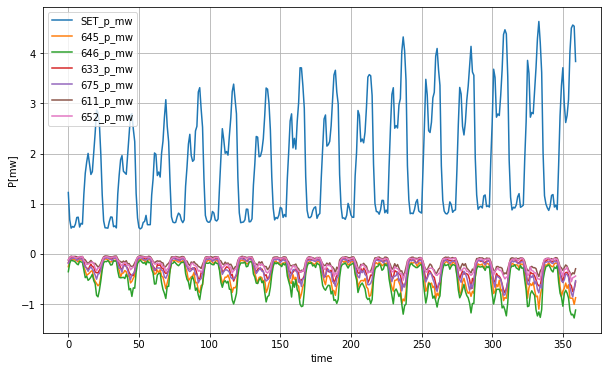

In [61]:
plot_results(Resultados, a = 0, b = 360, elements = True, lines = False, l_ep = False)

In [62]:
eco_res = {}

In [63]:
der_elements = [net.sgen['model'][0], net.sgen['model'][1],  net.sgen['model'][2], net.sgen['model'][3], 
                net.storage['model'][0], net.storage['model'][1]] 

In [64]:
ext_elements = [net.ext_grid['model'][0]]

In [65]:
lcoe = model_writer.lcoe()

In [66]:
tde = model_writer.total_discounted_energy()

In [67]:
ic = pe.value(model_writer.initial_cost_expression())

In [68]:
oc_e = model_writer.opetaring_costs_value(ext_elements)
oc_e

18642251.53118505

In [69]:
oc_der = model_writer.opetaring_costs_value(der_elements)
oc_der

0.0

In [70]:
eco_res['No DER'] = [lcoe, tde, ic/tde, oc_e/tde, oc_der/tde]
eco_res

{'No DER': [114.53409035260563,
  162765.9631625209,
  0.0,
  114.53409035260563,
  0.0]}

# LCOE with PVs

## Model Creation

### Additional Constraints

1) One PV plant
2) No Storage

In [71]:
model_writer.remove_constraint("no_PV")

In [72]:
model_writer.additional_constraint("one_PV", net.sgen['model'][0].create + net.sgen['model'][1].create + net.sgen['model'][2].create <= 1)

## Resolution

In [73]:
opt = pe.SolverFactory('cplex')
result_obj= opt.solve(model, tee=True)


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 20.1.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2020.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\jmsar\AppData\Local\Temp\tmpj3xnu3cv.cplex.log' open.
CPLEX> Problem 'C:\Users\jmsar\AppData\Local\Temp\tmp1oqi1wko.pyomo.lp' read.
Read time = 0.63 sec. (19.43 ticks)
CPLEX> Problem name         : C:\Users\jmsar\AppData\Local\Temp\tmp1oqi1wko.pyomo.lp
Objective sense      : Minimize
Variables            :  155536  [Nneg: 51849,  Box: 86400,  Free: 17280,
                                 Binary: 6,  General Integer: 1]
Objective nonzeros   :   17294
Linear constraints   :  207373  [Less: 103689,  Equal: 103684]
  Nonzeros           :  460832
  RHS nonzeros       :   51842

Variables  

In [74]:
model_writer.backconfigure_network()

In [75]:
model_writer.net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,max_p_mw,max_q_mvar,model
0,PV 684,8,0.0,0.0,NaN,1.0,False,wye,True,0.000000,0.000000,Resource: PV 684
1,PV 633,2,0.0,0.0,NaN,1.0,False,wye,True,0.000000,0.000000,Resource: PV 633
2,PV 646,4,0.0,0.0,NaN,1.0,True,wye,True,1.292195,0.646097,Resource: PV 646
3,WT 633,2,0.0,0.0,NaN,1.0,False,wye,True,0.000000,0.000000,Resource: WT 633


In [76]:
Resultados = model_writer.get_scenes_results()

In [77]:
Resultados

,SET_p_mw,645_p_mw,646_p_mw,633_p_mw,675_p_mw,611_p_mw,652_p_mw,PV 646_p_mw,L 650_632_pf_mw,L 632_671_pf_mw,L 671_684_pf_mw,L 632_645_pf_mw,L 645_646_pf_mw,L 632_633_pf_mw,L 671_675_pf_mw,L 684_611_pf_mw,L 684_652_pf_mw
0,1.222704,-0.255990,-0.356713,-0.175190,-0.192637,-0.122947,-0.119228,0.0,-1.222704,-0.434811,-0.242174,-0.612703,-0.356713,-0.175190,-0.192637,-0.122947,-0.119228
1,0.677586,-0.132850,-0.188934,-0.098647,-0.113097,-0.068033,-0.076027,0.0,-0.677586,-0.257156,-0.144059,-0.321783,-0.188934,-0.098647,-0.113097,-0.068033,-0.076027
2,0.512473,-0.116259,-0.124449,-0.075897,-0.094304,-0.044983,-0.056580,0.0,-0.512473,-0.195868,-0.101564,-0.240708,-0.124449,-0.075897,-0.094304,-0.044983,-0.056580
3,0.544492,-0.117860,-0.137721,-0.086528,-0.092453,-0.055043,-0.054887,0.0,-0.544492,-0.202383,-0.109930,-0.255580,-0.137721,-0.086528,-0.092453,-0.055043,-0.054887
4,0.529929,-0.106817,-0.144524,-0.078949,-0.087679,-0.051950,-0.060010,0.0,-0.529929,-0.199639,-0.111960,-0.251341,-0.144524,-0.078949,-0.087679,-0.051950,-0.060010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,4.094452,-0.758277,-1.203518,-0.606663,-0.667005,-0.355482,-0.503507,0.0,-4.094452,-1.525994,-0.858989,-1.961795,-1.203518,-0.606663,-0.667005,-0.355482,-0.503507
8636,4.877948,-1.049418,-1.280667,-0.611011,-0.910268,-0.456832,-0.569751,0.0,-4.877948,-1.936852,-1.026584,-2.330085,-1.280667,-0.611011,-0.910268,-0.456832,-0.569751
8637,5.470856,-1.237915,-1.497086,-0.810957,-0.873056,-0.414289,-0.637554,0.0,-5.470856,-1.924899,-1.051843,-2.735000,-1.497086,-0.810957,-0.873056,-0.414289,-0.637554
8638,4.656987,-1.005017,-1.261581,-0.707098,-0.732365,-0.460870,-0.490055,0.0,-4.656987,-1.683290,-0.950925,-2.266598,-1.261581,-0.707098,-0.732365,-0.460870,-0.490055


In [78]:
lcoe = model_writer.lcoe()

In [79]:
tde = model_writer.total_discounted_energy()

In [80]:
ic = pe.value(model_writer.initial_cost_expression())

In [81]:
oc_e = model_writer.opetaring_costs_value(ext_elements)
oc_e

16508698.72688691

In [82]:
oc_der = model_writer.opetaring_costs_value(der_elements)
oc_der

181519.52776245933

In [83]:
eco_res['PV Only'] = [lcoe, tde, ic/tde, oc_e/tde, oc_der/tde]
eco_res

{'No DER': [114.53409035260563,
  162765.9631625209,
  0.0,
  114.53409035260563,
  0.0],
 'PV Only': [113.32026052893717,
  162765.9631625209,
  10.77905393782567,
  101.42598861657008,
  1.1152179745418462]}

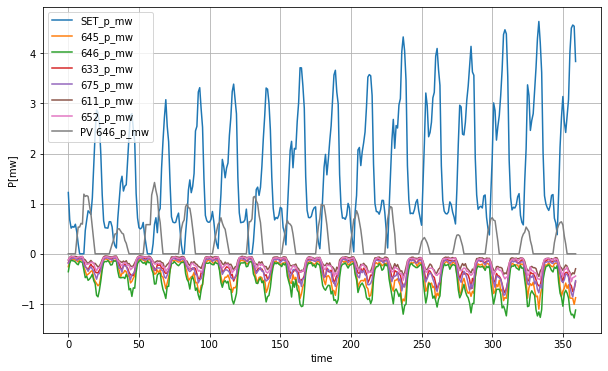

In [84]:
plot_results(Resultados, a = 0, b = 360, elements = True, lines = False, l_ep = False)

# LCOE with PV and ST

## Model Creation

### Additional Constraints

1) One PV plant
2) One Storage

In [85]:
model_writer.remove_if_has_constraint("no_ST")

True

In [86]:
model_writer.additional_constraint("one_ST", net.storage['model'][0].create + net.storage['model'][1].create <= 1)

## Resolution

In [87]:
opt = pe.SolverFactory('cplex')
result_obj= opt.solve(model, tee=True)


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 20.1.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2020.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\jmsar\AppData\Local\Temp\tmp_qkj0er6.cplex.log' open.
CPLEX> Problem 'C:\Users\jmsar\AppData\Local\Temp\tmp4z6syigo.pyomo.lp' read.
Read time = 0.53 sec. (19.49 ticks)
CPLEX> Problem name         : C:\Users\jmsar\AppData\Local\Temp\tmp4z6syigo.pyomo.lp
Objective sense      : Minimize
Variables            :  155536  [Nneg: 51849,  Box: 86400,  Free: 17280,
                                 Binary: 6,  General Integer: 1]
Objective nonzeros   :   17294
Linear constraints   :  207373  [Less: 103690,  Equal: 103683]
  Nonzeros           :  460832
  RHS nonzeros       :   51843

Variables  

In [88]:
model_writer.backconfigure_network()

In [89]:
model_writer.net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,max_p_mw,max_q_mvar,model
0,PV 684,8,0.0,0.0,NaN,1.0,True,wye,True,1.292195,0.646097,Resource: PV 684
1,PV 633,2,0.0,0.0,NaN,1.0,False,wye,True,0.000000,0.000000,Resource: PV 633
2,PV 646,4,0.0,0.0,NaN,1.0,False,wye,True,0.000000,0.000000,Resource: PV 646
3,WT 633,2,0.0,0.0,NaN,1.0,False,wye,True,0.000000,0.000000,Resource: WT 633


In [90]:
model_writer.net.storage

,name,bus,p_mw,q_mvar,sn_mva,soc_percent,min_e_mwh,max_e_mwh,scaling,in_service,type,max_p_mw,max_q_mvar,model
0,ST 684,8,0.0,0.0,NaN,NaN,0.0,0.0,1.0,False,None,0.0,0.0,Resource: ST 684
1,ST 632,1,0.0,0.0,NaN,NaN,0.0,0.0,1.0,False,None,0.0,0.0,Resource: ST 632


In [91]:
Resultados = model_writer.get_scenes_results()

In [92]:
Resultados

,SET_p_mw,645_p_mw,646_p_mw,633_p_mw,675_p_mw,611_p_mw,652_p_mw,PV 684_p_mw,L 650_632_pf_mw,L 632_671_pf_mw,L 671_684_pf_mw,L 632_645_pf_mw,L 645_646_pf_mw,L 632_633_pf_mw,L 671_675_pf_mw,L 684_611_pf_mw,L 684_652_pf_mw
0,1.222704,-0.255990,-0.356713,-0.175190,-0.192637,-0.122947,-0.119228,0.0,-1.222704,-0.434811,-0.242174,-0.612703,-0.356713,-0.175190,-0.192637,-0.122947,-0.119228
1,0.677586,-0.132850,-0.188934,-0.098647,-0.113097,-0.068033,-0.076027,0.0,-0.677586,-0.257156,-0.144059,-0.321783,-0.188934,-0.098647,-0.113097,-0.068033,-0.076027
2,0.512473,-0.116259,-0.124449,-0.075897,-0.094304,-0.044983,-0.056580,0.0,-0.512473,-0.195868,-0.101564,-0.240708,-0.124449,-0.075897,-0.094304,-0.044983,-0.056580
3,0.544492,-0.117860,-0.137721,-0.086528,-0.092453,-0.055043,-0.054887,0.0,-0.544492,-0.202383,-0.109930,-0.255580,-0.137721,-0.086528,-0.092453,-0.055043,-0.054887
4,0.529929,-0.106817,-0.144524,-0.078949,-0.087679,-0.051950,-0.060010,0.0,-0.529929,-0.199639,-0.111960,-0.251341,-0.144524,-0.078949,-0.087679,-0.051950,-0.060010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,4.094452,-0.758277,-1.203518,-0.606663,-0.667005,-0.355482,-0.503507,0.0,-4.094452,-1.525994,-0.858989,-1.961795,-1.203518,-0.606663,-0.667005,-0.355482,-0.503507
8636,4.877948,-1.049418,-1.280667,-0.611011,-0.910268,-0.456832,-0.569751,0.0,-4.877948,-1.936852,-1.026584,-2.330085,-1.280667,-0.611011,-0.910268,-0.456832,-0.569751
8637,5.470856,-1.237915,-1.497086,-0.810957,-0.873056,-0.414289,-0.637554,0.0,-5.470856,-1.924899,-1.051843,-2.735000,-1.497086,-0.810957,-0.873056,-0.414289,-0.637554
8638,4.656987,-1.005017,-1.261581,-0.707098,-0.732365,-0.460870,-0.490055,0.0,-4.656987,-1.683290,-0.950925,-2.266598,-1.261581,-0.707098,-0.732365,-0.460870,-0.490055


In [93]:
lcoe = model_writer.lcoe()

In [94]:
tde = model_writer.total_discounted_energy()

In [95]:
ic = pe.value(model_writer.initial_cost_expression())

In [96]:
oc_e = model_writer.opetaring_costs_value(ext_elements)
oc_e

16508698.72688695

In [97]:
oc_der = model_writer.opetaring_costs_value(der_elements)
oc_der

181519.52776245974

In [98]:
eco_res['PV + ST'] = [lcoe, tde, ic/tde, oc_e/tde, oc_der/tde]
eco_res

{'No DER': [114.53409035260563,
  162765.9631625209,
  0.0,
  114.53409035260563,
  0.0],
 'PV Only': [113.32026052893717,
  162765.9631625209,
  10.77905393782567,
  101.42598861657008,
  1.1152179745418462],
 'PV + ST': [113.32026052893742,
  162765.9631625209,
  10.7790539378258,
  101.42598861657034,
  1.115217974541849]}

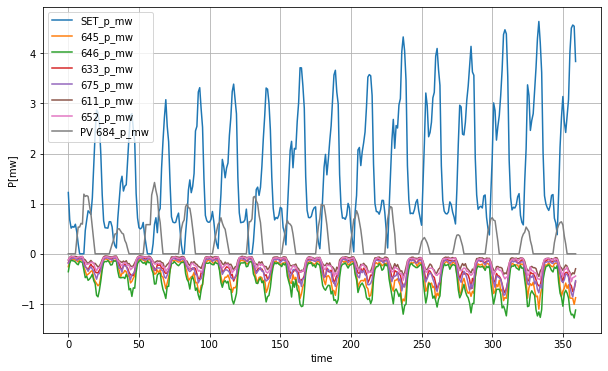

In [99]:
plot_results(Resultados, a = 0, b = 360, elements = True, lines = False, l_ep = False)

# LCOE with WT

## Model Creation

### Additional Constraints

1) No PV plant
2) No Storage
3) One WTG site

In [100]:
model_writer.remove_if_has_constraint("no_WT")
model_writer.remove_if_has_constraint("one_PV")
model_writer.remove_if_has_constraint("one_ST")

True

In [101]:
model_writer.additional_constraint("no_PV", net.sgen['model'][0].create + net.sgen['model'][1].create + net.sgen['model'][2].create == 0)
model_writer.additional_constraint("no_ST", net.storage['model'][0].create + net.storage['model'][1].create  == 0)

## Resolution

In [102]:
opt = pe.SolverFactory('cplex')
result_obj= opt.solve(model, tee=True)


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 20.1.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2020.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\jmsar\AppData\Local\Temp\tmphdwpss5d.cplex.log' open.
CPLEX> Problem 'C:\Users\jmsar\AppData\Local\Temp\tmp0kyak6xb.pyomo.lp' read.
Read time = 0.56 sec. (19.41 ticks)
CPLEX> Problem name         : C:\Users\jmsar\AppData\Local\Temp\tmp0kyak6xb.pyomo.lp
Objective sense      : Minimize
Variables            :  155536  [Nneg: 51849,  Box: 86400,  Free: 17280,
                                 Binary: 6,  General Integer: 1]
Objective nonzeros   :   17294
Linear constraints   :  207372  [Less: 103688,  Equal: 103684]
  Nonzeros           :  460831
  RHS nonzeros       :   51841

Variables  

In [103]:
model_writer.backconfigure_network()

In [104]:
model_writer.net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,max_p_mw,max_q_mvar,model
0,PV 684,8,0.0,0.0,NaN,1.0,False,wye,True,0.0,0.0,Resource: PV 684
1,PV 633,2,0.0,0.0,NaN,1.0,False,wye,True,0.0,0.0,Resource: PV 633
2,PV 646,4,0.0,0.0,NaN,1.0,False,wye,True,0.0,0.0,Resource: PV 646
3,WT 633,2,0.0,0.0,NaN,1.0,True,wye,True,2.4,1.2,Resource: WT 633


In [105]:
model_writer.net.storage

,name,bus,p_mw,q_mvar,sn_mva,soc_percent,min_e_mwh,max_e_mwh,scaling,in_service,type,max_p_mw,max_q_mvar,model
0,ST 684,8,0.0,0.0,NaN,NaN,0.0,0.0,1.0,False,None,0.0,0.0,Resource: ST 684
1,ST 632,1,0.0,0.0,NaN,NaN,0.0,0.0,1.0,False,None,0.0,0.0,Resource: ST 632


In [106]:
lcoe = model_writer.lcoe()

In [107]:
tde = model_writer.total_discounted_energy()

In [108]:
ic = pe.value(model_writer.initial_cost_expression())

In [109]:
oc_e = model_writer.opetaring_costs_value(ext_elements)
oc_e

13725570.983311156

In [110]:
oc_der = model_writer.opetaring_costs_value(der_elements)
oc_der

690711.0968891735

In [111]:
eco_res['WT Only'] = [lcoe, tde, ic/tde, oc_e/tde, oc_der/tde]
eco_res

{'No DER': [114.53409035260563,
  162765.9631625209,
  0.0,
  114.53409035260563,
  0.0],
 'PV Only': [113.32026052893717,
  162765.9631625209,
  10.77905393782567,
  101.42598861657008,
  1.1152179745418462],
 'PV + ST': [113.32026052893742,
  162765.9631625209,
  10.7790539378258,
  101.42598861657034,
  1.115217974541849],
 'WT Only': [110.74970300886109,
  162765.9631625209,
  22.179084188476402,
  84.32703445256703,
  4.243584367817136]}

In [112]:
Resultados = model_writer.get_scenes_results()

In [113]:
Resultados

,SET_p_mw,645_p_mw,646_p_mw,633_p_mw,675_p_mw,611_p_mw,652_p_mw,WT 633_p_mw,L 650_632_pf_mw,L 632_671_pf_mw,L 671_684_pf_mw,L 632_645_pf_mw,L 645_646_pf_mw,L 632_633_pf_mw,L 671_675_pf_mw,L 684_611_pf_mw,L 684_652_pf_mw
0,1.222704e+00,-0.255990,-0.356713,-0.175190,-0.192637,-0.122947,-0.119228,0.000000,-1.222704e+00,-0.434811,-0.242174,-0.612703,-0.356713,-0.175190,-0.192637,-0.122947,-0.119228
1,-1.887379e-15,-0.132850,-0.188934,-0.098647,-0.113097,-0.068033,-0.076027,0.677586,1.887379e-15,-0.257156,-0.144059,-0.321783,-0.188934,0.578939,-0.113097,-0.068033,-0.076027
2,-1.887379e-15,-0.116259,-0.124449,-0.075897,-0.094304,-0.044983,-0.056580,0.512473,1.887379e-15,-0.195868,-0.101564,-0.240708,-0.124449,0.436576,-0.094304,-0.044983,-0.056580
3,3.426000e-01,-0.117860,-0.137721,-0.086528,-0.092453,-0.055043,-0.054887,0.201892,-3.426000e-01,-0.202383,-0.109930,-0.255580,-0.137721,0.115363,-0.092453,-0.055043,-0.054887
4,3.865407e-01,-0.106817,-0.144524,-0.078949,-0.087679,-0.051950,-0.060010,0.143388,-3.865407e-01,-0.199639,-0.111960,-0.251341,-0.144524,0.064439,-0.087679,-0.051950,-0.060010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,3.318213e+00,-0.758277,-1.203518,-0.606663,-0.667005,-0.355482,-0.503507,0.776239,-3.318213e+00,-1.525994,-0.858989,-1.961795,-1.203518,0.169576,-0.667005,-0.355482,-0.503507
8636,4.209412e+00,-1.049418,-1.280667,-0.611011,-0.910268,-0.456832,-0.569751,0.668536,-4.209412e+00,-1.936852,-1.026584,-2.330085,-1.280667,0.057525,-0.910268,-0.456832,-0.569751
8637,5.200094e+00,-1.237915,-1.497086,-0.810957,-0.873056,-0.414289,-0.637554,0.270763,-5.200094e+00,-1.924899,-1.051843,-2.735000,-1.497086,-0.540195,-0.873056,-0.414289,-0.637554
8638,4.326522e+00,-1.005017,-1.261581,-0.707098,-0.732365,-0.460870,-0.490055,0.330465,-4.326522e+00,-1.683290,-0.950925,-2.266598,-1.261581,-0.376634,-0.732365,-0.460870,-0.490055


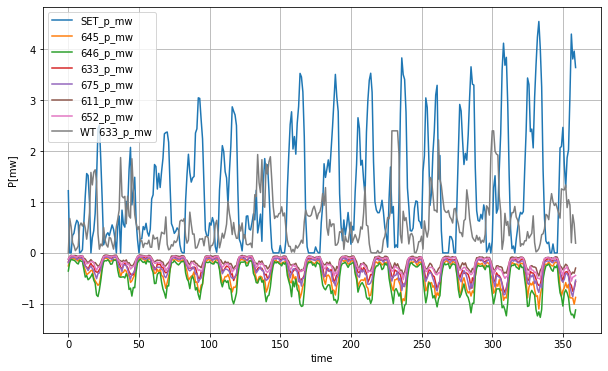

In [114]:
plot_results(Resultados, a = 0, b = 360, elements = True, lines = False, l_ep = False)

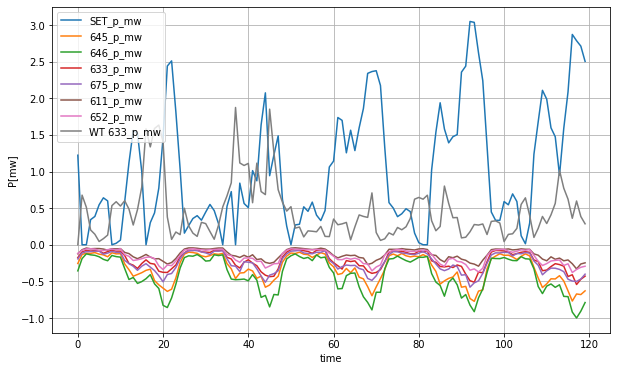

In [115]:
plot_results(Resultados, a = 0, b = 120, elements = True, lines = False, l_ep = False)

# LCOE with PV, WT and ST

## Model Creation

### Additional Constraints

1) One PV plant
2) One Storage
3) One WTG site

In [116]:
model_writer.remove_if_has_constraint("no_ST")
model_writer.remove_if_has_constraint("no_PV")
model_writer.remove_if_has_constraint("no_WT")

False

In [117]:
model_writer.additional_constraint("one_PV", net.sgen['model'][0].create + net.sgen['model'][1].create + net.sgen['model'][2].create <= 1)
model_writer.additional_constraint("one_ST", net.storage['model'][0].create + net.storage['model'][1].create <= 1)

## Resolution

In [118]:
opt = pe.SolverFactory('cplex')
result_obj= opt.solve(model, tee=True)


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 20.1.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2020.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\jmsar\AppData\Local\Temp\tmpxx71fgco.cplex.log' open.
CPLEX> Problem 'C:\Users\jmsar\AppData\Local\Temp\tmpm5ez8gws.pyomo.lp' read.
Read time = 0.67 sec. (19.55 ticks)
CPLEX> Problem name         : C:\Users\jmsar\AppData\Local\Temp\tmpm5ez8gws.pyomo.lp
Objective sense      : Minimize
Variables            :  155536  [Nneg: 51849,  Box: 86400,  Free: 17280,
                                 Binary: 6,  General Integer: 1]
Objective nonzeros   :   17294
Linear constraints   :  207372  [Less: 103690,  Equal: 103682]
  Nonzeros           :  460831
  RHS nonzeros       :   51843

Variables  

In [119]:
model_writer.backconfigure_network()

In [120]:
model_writer.net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,max_p_mw,max_q_mvar,model
0,PV 684,8,0.0,0.0,NaN,1.0,True,wye,True,0.366585,0.183292,Resource: PV 684
1,PV 633,2,0.0,0.0,NaN,1.0,False,wye,True,0.000000,0.000000,Resource: PV 633
2,PV 646,4,0.0,0.0,NaN,1.0,False,wye,True,0.000000,0.000000,Resource: PV 646
3,WT 633,2,0.0,0.0,NaN,1.0,True,wye,True,2.400000,1.200000,Resource: WT 633


In [121]:
model_writer.net.storage

,name,bus,p_mw,q_mvar,sn_mva,soc_percent,min_e_mwh,max_e_mwh,scaling,in_service,type,max_p_mw,max_q_mvar,model
0,ST 684,8,0.0,0.0,NaN,NaN,0.0,0.0,1.0,False,None,0.0,0.0,Resource: ST 684
1,ST 632,1,0.0,0.0,NaN,NaN,0.0,0.0,1.0,False,None,0.0,0.0,Resource: ST 632


In [122]:
lcoe = model_writer.lcoe()

In [123]:
tde = model_writer.total_discounted_energy()

In [124]:
ic = pe.value(model_writer.initial_cost_expression())

In [125]:
oc_e = model_writer.opetaring_costs_value(ext_elements)
oc_e

13176726.434613189

In [126]:
oc_der = model_writer.opetaring_costs_value(der_elements)
oc_der

730832.7131726913

In [127]:
eco_res['WT + PV'] = [lcoe, tde, ic/tde, oc_e/tde, oc_der/tde]
eco_res

{'No DER': [114.53409035260563,
  162765.9631625209,
  0.0,
  114.53409035260563,
  0.0],
 'PV Only': [113.32026052893717,
  162765.9631625209,
  10.77905393782567,
  101.42598861657008,
  1.1152179745418462],
 'PV + ST': [113.32026052893742,
  162765.9631625209,
  10.7790539378258,
  101.42598861657034,
  1.115217974541849],
 'WT Only': [110.74970300886109,
  162765.9631625209,
  22.179084188476402,
  84.32703445256703,
  4.243584367817136],
 'WT + PV': [110.72615215101699,
  162765.9631625209,
  25.281020518064786,
  80.95504845479458,
  4.490083178157825]}

In [128]:
Resultados = model_writer.get_scenes_results()

In [129]:
Resultados

,SET_p_mw,645_p_mw,646_p_mw,633_p_mw,675_p_mw,611_p_mw,652_p_mw,PV 684_p_mw,WT 633_p_mw,L 650_632_pf_mw,L 632_671_pf_mw,L 671_684_pf_mw,L 632_645_pf_mw,L 645_646_pf_mw,L 632_633_pf_mw,L 671_675_pf_mw,L 684_611_pf_mw,L 684_652_pf_mw
0,1.222704e+00,-0.255990,-0.356713,-0.175190,-0.192637,-0.122947,-0.119228,0.0,0.000000,-1.222704e+00,-0.434811,-0.242174,-0.612703,-0.356713,-0.175190,-0.192637,-0.122947,-0.119228
1,-1.776357e-15,-0.132850,-0.188934,-0.098647,-0.113097,-0.068033,-0.076027,0.0,0.677586,1.776357e-15,-0.257156,-0.144059,-0.321783,-0.188934,0.578939,-0.113097,-0.068033,-0.076027
2,-1.776357e-15,-0.116259,-0.124449,-0.075897,-0.094304,-0.044983,-0.056580,0.0,0.512473,1.776357e-15,-0.195868,-0.101564,-0.240708,-0.124449,0.436576,-0.094304,-0.044983,-0.056580
3,3.426000e-01,-0.117860,-0.137721,-0.086528,-0.092453,-0.055043,-0.054887,0.0,0.201892,-3.426000e-01,-0.202383,-0.109930,-0.255580,-0.137721,0.115363,-0.092453,-0.055043,-0.054887
4,3.865407e-01,-0.106817,-0.144524,-0.078949,-0.087679,-0.051950,-0.060010,0.0,0.143388,-3.865407e-01,-0.199639,-0.111960,-0.251341,-0.144524,0.064439,-0.087679,-0.051950,-0.060010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,3.318213e+00,-0.758277,-1.203518,-0.606663,-0.667005,-0.355482,-0.503507,0.0,0.776239,-3.318213e+00,-1.525994,-0.858989,-1.961795,-1.203518,0.169576,-0.667005,-0.355482,-0.503507
8636,4.209412e+00,-1.049418,-1.280667,-0.611011,-0.910268,-0.456832,-0.569751,0.0,0.668536,-4.209412e+00,-1.936852,-1.026584,-2.330085,-1.280667,0.057525,-0.910268,-0.456832,-0.569751
8637,5.200094e+00,-1.237915,-1.497086,-0.810957,-0.873056,-0.414289,-0.637554,0.0,0.270763,-5.200094e+00,-1.924899,-1.051843,-2.735000,-1.497086,-0.540195,-0.873056,-0.414289,-0.637554
8638,4.326522e+00,-1.005017,-1.261581,-0.707098,-0.732365,-0.460870,-0.490055,0.0,0.330465,-4.326522e+00,-1.683290,-0.950925,-2.266598,-1.261581,-0.376634,-0.732365,-0.460870,-0.490055


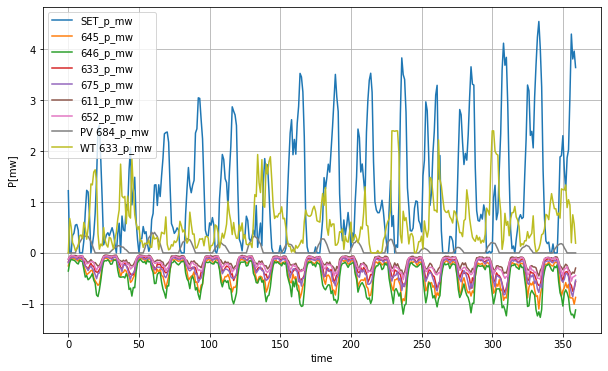

In [130]:
plot_results(Resultados, a = 0, b = 360, elements = True, lines = False, l_ep = False)

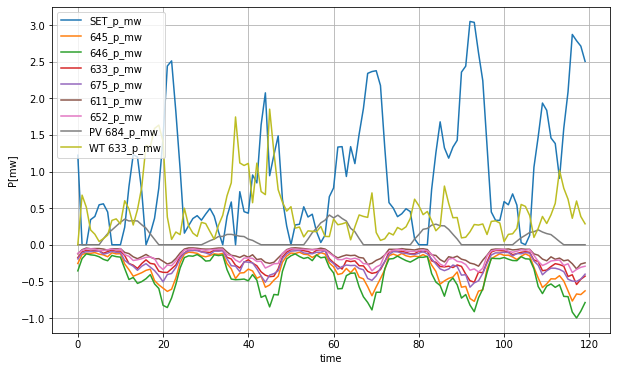

In [131]:
plot_results(Resultados, a = 0, b = 120, elements = True, lines = False, l_ep = False)

# Results

In [132]:
import numpy as np

In [133]:
import matplotlib.colors as mcolors

In [134]:
eco_res

{'No DER': [114.53409035260563,
  162765.9631625209,
  0.0,
  114.53409035260563,
  0.0],
 'PV Only': [113.32026052893717,
  162765.9631625209,
  10.77905393782567,
  101.42598861657008,
  1.1152179745418462],
 'PV + ST': [113.32026052893742,
  162765.9631625209,
  10.7790539378258,
  101.42598861657034,
  1.115217974541849],
 'WT Only': [110.74970300886109,
  162765.9631625209,
  22.179084188476402,
  84.32703445256703,
  4.243584367817136],
 'WT + PV': [110.72615215101699,
  162765.9631625209,
  25.281020518064786,
  80.95504845479458,
  4.490083178157825]}

In [135]:
del eco_res['PV + ST']

In [136]:
columns = [k for k in eco_res.keys()]
columns

['No DER', 'PV Only', 'WT Only', 'WT + PV']

In [137]:
rows = ['Initial Cost', 'External Energy', 'Operating Cost']

In [138]:
data = [eco_res[k][2:] for k in eco_res.keys()] 

In [139]:
data

[[0.0, 114.53409035260563, 0.0],
 [10.77905393782567, 101.42598861657008, 1.1152179745418462],
 [22.179084188476402, 84.32703445256703, 4.243584367817136],
 [25.281020518064786, 80.95504845479458, 4.490083178157825]]

In [140]:
data[0]

[0.0, 114.53409035260563, 0.0]

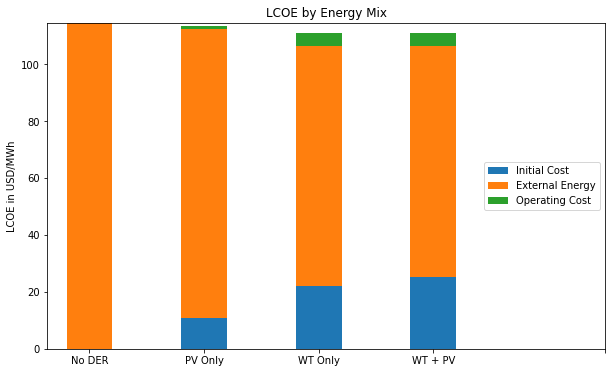

In [141]:
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
    
values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
colors = [color for name, color in mcolors.TABLEAU_COLORS.items()]
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

for col in range(len(columns)):
    y_offset = 0
    for d in range(len(data[col])):
        dat = data[col][d]
        plt.bar(0.5 + 1*col, dat, bar_width, bottom=y_offset, color =colors[d])
        y_offset += dat


# Adjust layout to make room for the table:
#plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("LCOE in USD/MWh")
#plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([0.5, 1.5, 2.5, 3.5, 5], columns + [''])
plt.title('LCOE by Energy Mix')

ax.legend(rows, loc = 'center right')

plt.show()